In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import os
import cv2

In [2]:
# Testing the os path join with directory and filling in the different classes of Brain Tumor in categories. 
dir1 = ('BrainTumor/Training')
categories = []

for file in os.listdir(dir1):
    categories.append(file)
    
for i in categories:
    file_path = os.path.join(dir1,i)
    
    for file in os.listdir(file_path):
        img_path = os.path.join(file_path, file)
        image = cv2.imread(img_path)

['glioma', 'meningioma', 'notumor', 'pituitary']
(512, 512, 3)


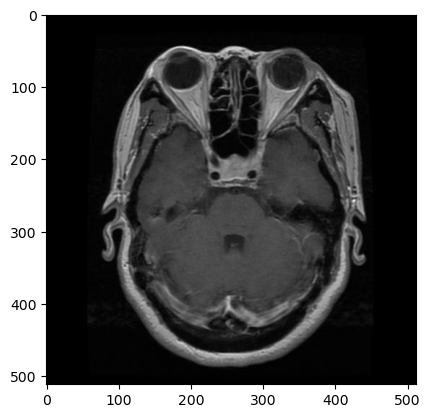

In [3]:
plt.imshow(image)
print(categories)
print(image.shape)

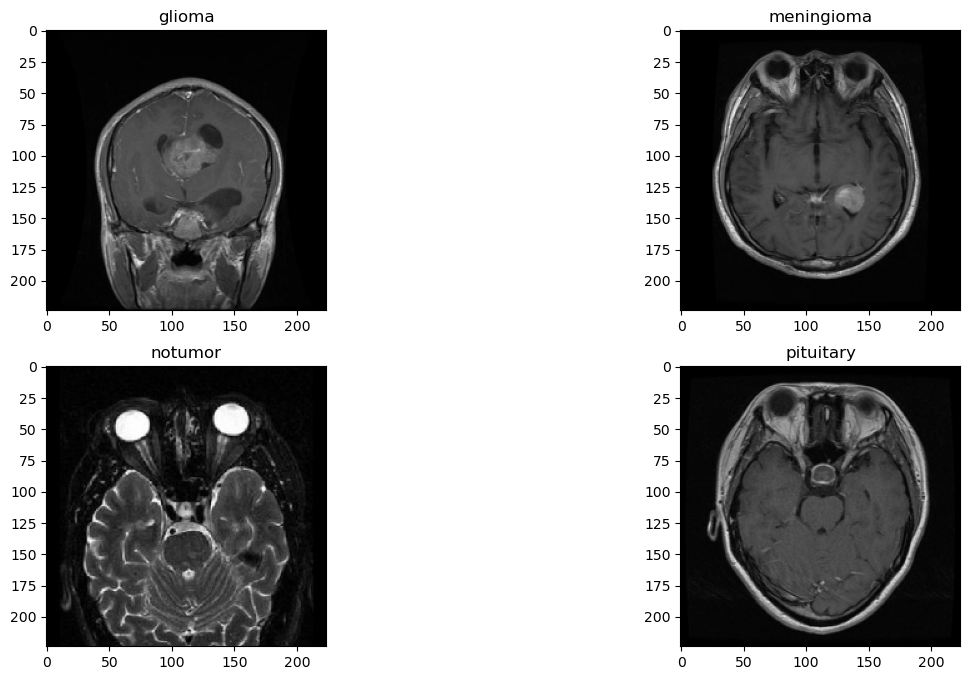

In [4]:
# Sample Pictures
plt.figure(figsize=(15,8))

img_path = ['/glioma/Tr-glTr_0001.jpg','/meningioma/Tr-meTr_0001.jpg','/notumor/Tr-noTr_0001.jpg','/pituitary/Tr-piTr_0001.jpg']

for i in range(4):
    ax = plt.subplot(2, 2, i + 1)
    img = cv2.imread(dir1 + img_path[i])
    img = cv2.resize(img, (224, 224))
    plt.imshow(img)
    plt.title(categories[i])

In [5]:
# Creating and resizing the data array for the training and testing sets. 
training_path = ('BrainTumor/Training')
test_path = ('BrainTumor/Testing')

training_data = []
test_data = []

def create_data(path, data):
    for category in categories:
        file = os.path.join(path, category)
        class_num = categories.index(category)
        for img in os.listdir(file):
            img_array = cv2.imread(os.path.join(file,img))
            new_array = cv2.resize(img_array,(256,256))
            data.append([new_array, class_num])
create_data(training_path, training_data)
create_data(test_path, test_data)

In [6]:
# Length of the training and testing sets
lenoftraining = len(training_data)
lenoftest = len(test_data)
print(lenoftraining,lenoftest)

5712 1311


In [7]:
# Seperating the features and ouput classes. 
un_X_train = []
Y_train = []
un_X_test = []
Y_test = []

for categories_1, label in training_data:
    un_X_train.append(categories_1)
    Y_train.append(label)
    
for categories_1,label in test_data:
    un_X_test.append(categories_1)
    Y_test.append(label)

In [8]:
# Reshaping the array to be used for processing. 
un_X_train = np.array(un_X_train).reshape(lenoftraining,-1)
Y_train = np.array(Y_train)
un_X_test = np.array(un_X_test).reshape(lenoftest,-1)
Y_test = np.array(Y_test)
print(un_X_train.shape, Y_train.shape, un_X_test.shape, Y_test.shape)

(5712, 196608) (5712,) (1311, 196608) (1311,)


In [9]:
pca = PCA(n_components = 200)
X_train = pca.fit_transform(un_X_train)
X_test = pca.fit_transform(un_X_test)
sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.fit_transform(X_test)
model = SVC(kernel = 'rbf')
model.fit(X_train_sc, Y_train)
predicted = model.predict(X_test_sc)
matrix = confusion_matrix(Y_test, predicted)
report = classification_report(Y_test, predicted)
print("Confusion Matrix: \n",matrix)
print("\n")
print("Classification Report: \n", report)

Confusion Matrix: 
 [[168  80  11  41]
 [ 57 112 115  22]
 [ 54  69 249  33]
 [ 48  81  47 124]]


Classification Report: 
               precision    recall  f1-score   support

           0       0.51      0.56      0.54       300
           1       0.33      0.37      0.35       306
           2       0.59      0.61      0.60       405
           3       0.56      0.41      0.48       300

    accuracy                           0.50      1311
   macro avg       0.50      0.49      0.49      1311
weighted avg       0.51      0.50      0.50      1311



In [10]:
pca = PCA(n_components = 50)
X_train = pca.fit_transform(un_X_train)
X_test = pca.fit_transform(un_X_test)
sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.fit_transform(X_test)
model = SVC(kernel = 'rbf', gamma = 'auto')
model.fit(X_train_sc, Y_train)
predicted = model.predict(X_test_sc)
matrix = confusion_matrix(Y_test, predicted)
report = classification_report(Y_test, predicted)
print("Confusion Matrix: \n",matrix)
print("\n")
print("Classification Report: \n", report)

Confusion Matrix: 
 [[194  52  17  37]
 [ 70 102 113  21]
 [ 47  58 281  19]
 [ 38  83  52 127]]


Classification Report: 
               precision    recall  f1-score   support

           0       0.56      0.65      0.60       300
           1       0.35      0.33      0.34       306
           2       0.61      0.69      0.65       405
           3       0.62      0.42      0.50       300

    accuracy                           0.54      1311
   macro avg       0.53      0.52      0.52      1311
weighted avg       0.54      0.54      0.53      1311



In [11]:
pca = PCA(n_components = 500)
X_train = pca.fit_transform(un_X_train)
X_test = pca.fit_transform(un_X_test)
sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.fit_transform(X_test)
model = SVC(kernel = 'rbf')
model.fit(X_train_sc, Y_train)
predicted = model.predict(X_test_sc)
matrix = confusion_matrix(Y_test, predicted)
report = classification_report(Y_test, predicted)

print("Confusion Matrix: \n",matrix)
print("\n")
print("Classification Report: \n", report)

Confusion Matrix: 
 [[144 111  17  28]
 [ 36 126 120  24]
 [ 74  81 203  47]
 [ 31  82 111  76]]


Classification Report: 
               precision    recall  f1-score   support

           0       0.51      0.48      0.49       300
           1       0.32      0.41      0.36       306
           2       0.45      0.50      0.47       405
           3       0.43      0.25      0.32       300

    accuracy                           0.42      1311
   macro avg       0.43      0.41      0.41      1311
weighted avg       0.43      0.42      0.42      1311



In [ ]:
report_data = classification_report(Y_test, predicted, output_dict=True)
data = pd.DataFrame(report_data)
data

In [ ]:
print(data.values[0,0]) # Precision_0
print(data.values[0,1]) # Precision_1
print(data.values[0,2]) # Precision_2
print(data.values[0,3]) # Precision_3
print(data.values[1,0]) # Recall_0
print(data.values[1,1]) # Recall_1
print(data.values[1,2]) # Recall_2
print(data.values[1,3]) # Recall_3
print(data.values[0,4]) # Accuracy

In [ ]:
components = range(30, 51)

comps_count = []
high_count = 0
max_accuracy = 0
Precision_0 = []
Precision_1 = []
Precision_2 = []
Precision_3 = []
Recall_0 = []
Recall_1 = []
Recall_2 = []
Recall_3 = []
Accuracy = []


for N in components:
    pca = PCA(n_components = N)
    comps_count.append(N)
    X_train = pca.fit_transform(un_X_train)
    X_test = pca.fit_transform(un_X_test)
    sc = StandardScaler()
    X_train_sc = sc.fit_transform(X_train)
    X_test_sc = sc.fit_transform(X_test)
    model = SVC(kernel = 'rbf', gamma = 'auto')
    model.fit(X_train_sc, Y_train)
    predicted = model.predict(X_test_sc)
    matrix = confusion_matrix(Y_test, predicted)
    report = classification_report(Y_test, predicted)
    report_data = classification_report(Y_test, predicted, output_dict=True)
    data = pd.DataFrame(report_data)
    Precision_0.append(data.values[0,0])
    Precision_1.append(data.values[0,1])
    Precision_2.append(data.values[0,2])
    Precision_3.append(data.values[0,3])
    Recall_0.append(data.values[1,0])
    Recall_1.append(data.values[1,1])
    Recall_2.append(data.values[1,2])
    Recall_3.append(data.values[1,3])
    Accuracy.append(data.values[0,4])
    if data.values[0,4] > max_accuracy:
        max_accuracy = data.values[0,4]
        high_count = N